# Step 3: Exploratory Data Analysis (EDA)

**Objective:** Discover trends, correlations, and KPIs in the cleaned data
through statistical summaries and visual analysis.

---

## 3.1 Setup

In [1]:
import sys
sys.path.insert(0, "..")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.data_loader import load_dataset
from src.preprocessing import drop_irrelevant_columns, handle_missing_values, fix_invalid_entries, validate_dtypes
from src.feature_engineering import create_date_features
from src.visualization import (
    plot_correlation_heatmap,
    plot_fare_distribution,
    plot_fare_by_airline,
    plot_seasonal_fares,
)

sns.set_theme(style="whitegrid", palette="deep", font_scale=1.1)

# Load cleaned data (re-run cleaning steps on raw data)
df = load_dataset("../data/raw/Flight_Price_Dataset_of_Bangladesh.csv")
df = drop_irrelevant_columns(df)
df = handle_missing_values(df)
df = fix_invalid_entries(df)
df = validate_dtypes(df)
df = create_date_features(df)
print(f"\nCleaned dataset: {df.shape}")

Loaded 57,000 rows × 17 columns from Flight_Price_Dataset_of_Bangladesh.csv
Renamed columns: {'Base Fare (BDT)': 'Base Fare', 'Tax & Surcharge (BDT)': 'Tax & Surcharge', 'Total Fare (BDT)': 'Total Fare', 'Departure Date & Time': 'Date', 'Duration (hrs)': 'Duration', 'Days Before Departure': 'DaysBeforeDeparture'}
Dropped redundant columns: ['Source Name', 'Destination Name', 'Arrival Date & Time']
No extra irrelevant columns found to drop.
Total remaining missing values: 0
Rows: 57,000 -> 57,000 (removed 0)
  Base Fare -> float64
  Tax & Surcharge -> float64
  Total Fare -> float64


  Date -> datetime64
  Airline -> category
  Source -> category
  Destination -> category
  Stopovers -> category
  Aircraft Type -> category
  Class -> category
  Booking Source -> category
  Seasonality -> category
Created date features: Month, Day, Weekday, WeekdayName, Season

Cleaned dataset: (57000, 19)


C:\Users\NoahJamalNabila\Desktop\Flight-Price-Prediction\notebooks\..\src\preprocessing.py:210: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors="coerce", dayfirst=True)


## 3.2 Descriptive Statistics

In [2]:
# Summary by Airline
df.groupby("Airline")["Total Fare"].describe().round(2)

C:\Users\NoahJamalNabila\AppData\Local\Temp\ipykernel_5552\3858806458.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Airline")["Total Fare"].describe().round(2)


,count,mean,std,min,25%,50%,75%,max
Airline,,,,,,,,
Air Arabia,2217.0,69924.01,80842.74,1805.98,9726.15,42120.80,97461.66,446442.77
Air Astra,2304.0,68497.41,78243.99,1872.59,9665.53,40507.21,100851.21,459992.38
Air India,2280.0,72474.18,83772.26,1816.37,9656.93,42429.62,103057.77,404646.53
AirAsia,2312.0,74534.39,85962.63,1804.13,9438.71,42763.82,111325.26,415248.03
Biman Bangladesh Airlines,2344.0,70192.97,81289.83,1854.06,9373.75,40733.36,101751.78,489089.92
British Airways,2209.0,70555.54,80049.76,1846.02,9737.39,41236.30,107983.83,522606.37
Cathay Pacific,2282.0,73325.09,83285.51,1805.89,9663.97,46282.46,106516.09,419822.09
Emirates,2327.0,70106.15,80542.71,1840.50,10037.71,41478.51,104150.43,473812.80
Etihad Airways,2267.0,71785.24,80227.15,1828.22,10279.37,43723.22,109431.76,472869.99


In [3]:
# Summary by Source
df.groupby("Source")["Total Fare"].describe().round(2)

C:\Users\NoahJamalNabila\AppData\Local\Temp\ipykernel_5552\3731747557.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Source")["Total Fare"].describe().round(2)


,count,mean,std,min,25%,50%,75%,max
Source,,,,,,,,
BZL,7102.0,72679.11,83073.38,1824.63,9917.90,43584.81,105611.90,489089.92
CGP,7241.0,70877.63,82236.61,1809.27,9566.20,40416.26,103504.13,524278.76
CXB,7049.0,71012.87,81382.15,1804.13,9422.31,41133.57,104190.51,479213.62
DAC,7146.0,70349.71,81107.22,1805.89,9505.38,40935.91,103579.93,466709.75
JSR,7149.0,69545.90,80296.04,1808.64,9519.30,40820.00,101228.75,473812.80
RJH,7091.0,70532.91,82069.23,1800.98,9368.29,39743.69,103572.14,522606.37
SPD,7043.0,71306.31,81523.10,1812.39,9742.82,41149.84,105337.63,546970.92
ZYL,7179.0,71946.58,82426.62,1801.20,9916.21,42643.37,104098.28,558987.33


In [4]:
# Summary by Destination
df.groupby("Destination")["Total Fare"].describe().round(2)

C:\Users\NoahJamalNabila\AppData\Local\Temp\ipykernel_5552\3323796420.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Destination")["Total Fare"].describe().round(2)


,count,mean,std,min,25%,50%,75%,max
Destination,,,,,,,,
BKK,3036.0,107971.30,80852.07,10767.18,48021.98,79582.96,147050.02,405746.39
BZL,2641.0,7654.84,3855.61,1805.89,4160.25,7277.12,10751.78,21039.44
CCU,2938.0,104605.99,82609.79,6612.82,43141.00,75946.13,143090.59,447814.56
CGP,2613.0,7610.48,3853.13,1812.39,4209.36,7208.29,10633.31,26971.20
CXB,2652.0,7496.47,3854.01,1805.98,4063.03,7007.59,10484.67,24497.50
DAC,2591.0,7645.27,3895.68,1801.20,4163.68,7157.94,10642.22,24908.88
DEL,3069.0,104542.63,82056.43,6712.88,43871.29,75419.01,140830.02,524278.76
DOH,2923.0,107011.91,81769.37,8717.07,46365.52,79583.13,145003.05,473812.80
DXB,3005.0,109374.48,84689.61,8813.64,46922.20,79052.73,148955.05,489089.92


In [5]:
# Summary by Season
if "Season" in df.columns:
    display(df.groupby("Season")["Total Fare"].describe().round(2))

,count,mean,std,min,25%,50%,75%,max
Season,,,,,,,,
Autumn,14440.0,67855.06,77770.97,1800.98,9197.30,39487.27,99511.96,413660.96
Monsoon,14285.0,69178.04,80395.19,1801.20,9334.91,40255.91,100128.75,558987.33
Summer,14416.0,68604.20,78371.89,1817.87,9474.66,40434.86,101289.13,524278.76
Winter,13859.0,78771.52,89820.69,2017.80,10651.84,46528.81,116001.05,493383.97


## 3.3 Correlation Analysis

Saved -> reports\figures\correlation_heatmap.png


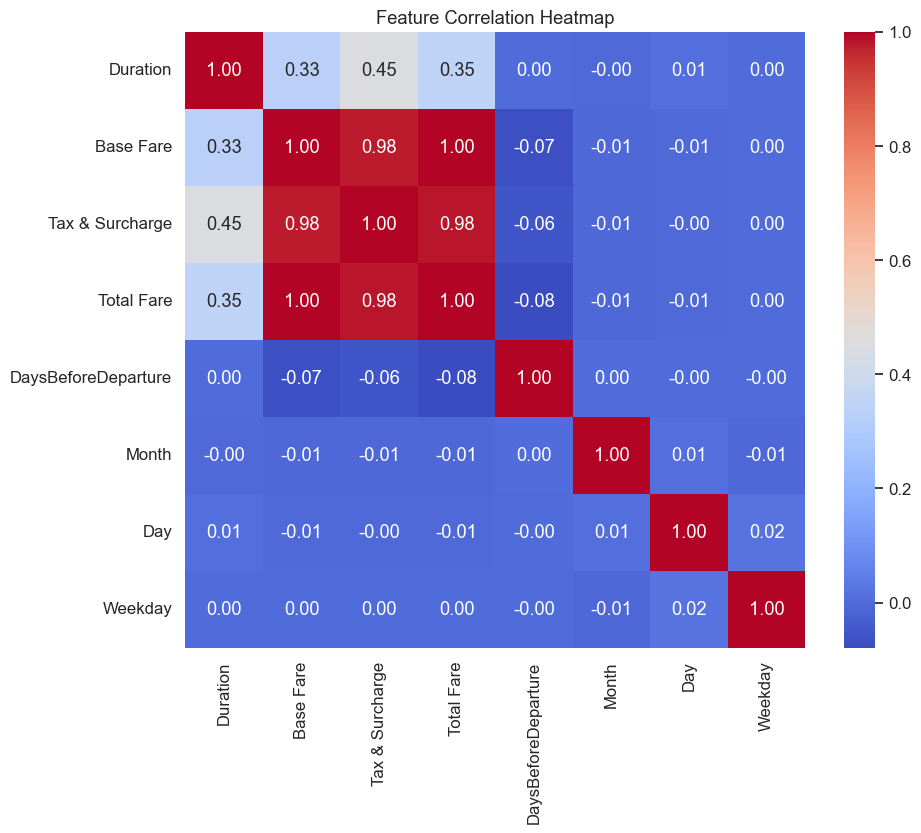

<Axes: title={'center': 'Feature Correlation Heatmap'}>

In [6]:
plot_correlation_heatmap(df)

## 3.4 Fare Distribution

Saved -> reports\figures\fare_distribution.png


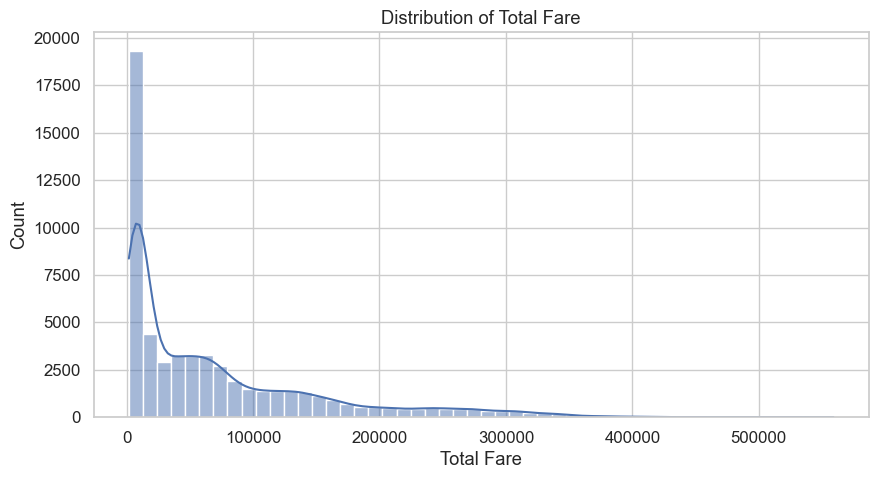

<Axes: title={'center': 'Distribution of Total Fare'}, xlabel='Total Fare', ylabel='Count'>

In [7]:
plot_fare_distribution(df)

In [8]:
# Check skewness — if heavily skewed, log transform may help modeling
skew = df["Total Fare"].skew()
print(f"Total Fare skewness: {skew:.2f}")
if abs(skew) > 1:
    print("→ Highly skewed — consider log transformation for modeling.")

Total Fare skewness: 1.58
→ Highly skewed — consider log transformation for modeling.


## 3.5 Fare by Airline

C:\Users\NoahJamalNabila\Desktop\Flight-Price-Prediction\notebooks\..\src\visualization.py:60: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  order = df.groupby("Airline")["Total Fare"].mean().sort_values(ascending=False).index


Saved -> reports\figures\fare_by_airline.png


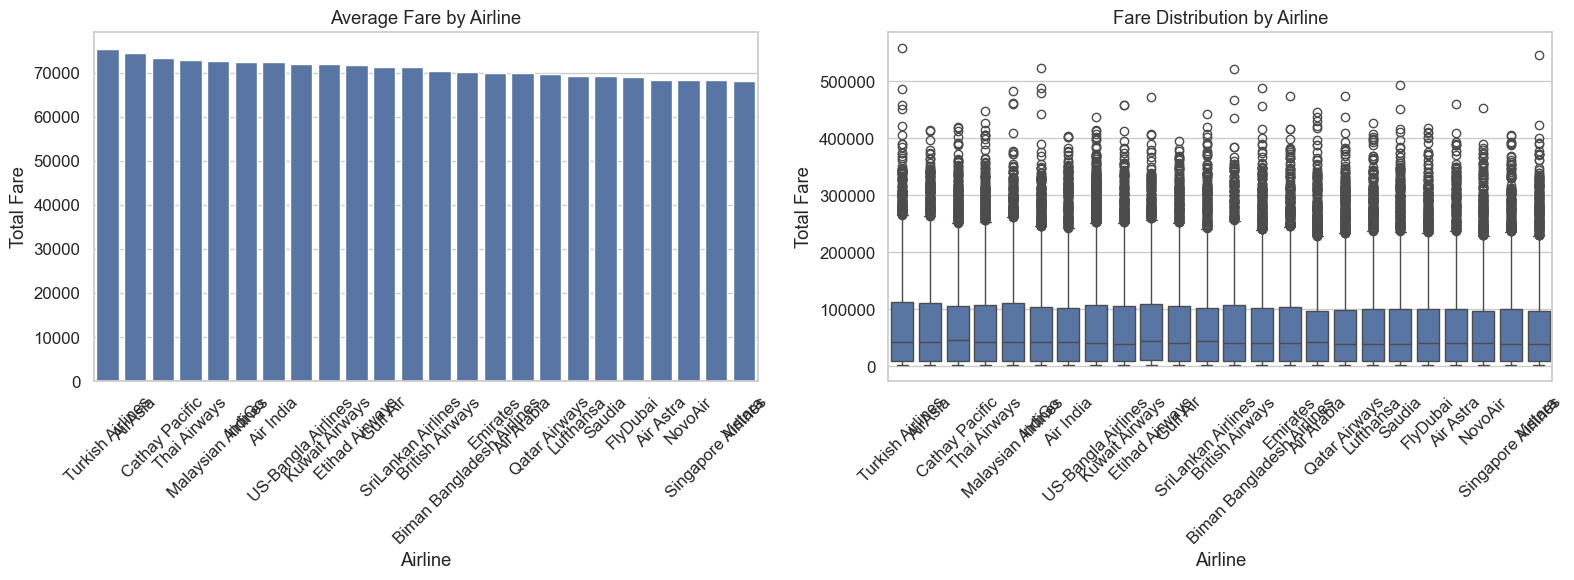

array([<Axes: title={'center': 'Average Fare by Airline'}, xlabel='Airline', ylabel='Total Fare'>,
       <Axes: title={'center': 'Fare Distribution by Airline'}, xlabel='Airline', ylabel='Total Fare'>],
      dtype=object)

In [9]:
plot_fare_by_airline(df)

## 3.6 Seasonal Fare Variation

Saved -> reports\figures\seasonal_fares.png


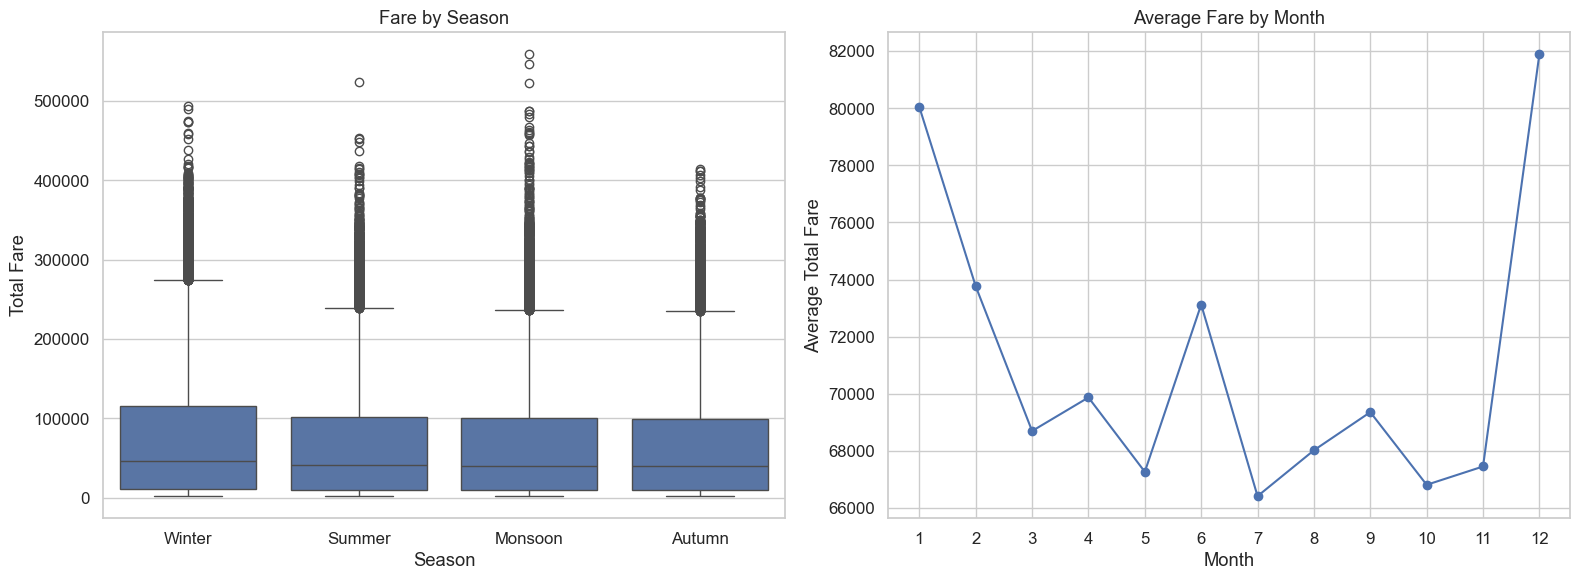

array([<Axes: title={'center': 'Fare by Season'}, xlabel='Season', ylabel='Total Fare'>,
       <Axes: title={'center': 'Average Fare by Month'}, xlabel='Month', ylabel='Average Total Fare'>],
      dtype=object)

In [10]:
plot_seasonal_fares(df)

## 3.7 KPI Dashboard

In [11]:
# Average fare per airline
print("=== Average Fare per Airline ===")
print(df.groupby("Airline")["Total Fare"].mean().sort_values(ascending=False).round(2).to_string())

=== Average Fare per Airline ===
Airline
Turkish Airlines             75547.27
AirAsia                      74534.39
Cathay Pacific               73325.09
Thai Airways                 72845.79
Malaysian Airlines           72775.18
IndiGo                       72504.43
Air India                    72474.18
US-Bangla Airlines           72088.29
Kuwait Airways               71988.28
Etihad Airways               71785.24
Gulf Air                     71458.16
SriLankan Airlines           71265.26
British Airways              70555.54
Biman Bangladesh Airlines    70192.97
Emirates                     70106.15
Air Arabia                   69924.01
Qatar Airways                69865.54
Lufthansa                    69293.16
Saudia                       69270.68
FlyDubai                     68987.69
Air Astra                    68497.41
NovoAir                      68350.86
Singapore Airlines           68323.93
Vistara                      68108.24


C:\Users\NoahJamalNabila\AppData\Local\Temp\ipykernel_5552\3156407190.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("Airline")["Total Fare"].mean().sort_values(ascending=False).round(2).to_string())


In [12]:
# Most popular route (highest frequency)
print("=== Most Popular Routes ===")
routes = df.groupby(["Source", "Destination"]).size().sort_values(ascending=False)
print(routes.head(10).to_string())

=== Most Popular Routes ===
Source  Destination
RJH     SIN            417
DAC     DXB            413
BZL     YYZ            410
CXB     DEL            408
CGP     BKK            408
BZL     JED            407
RJH     JFK            404
SPD     DEL            404
CGP     CXB            404
        RJH            403


C:\Users\NoahJamalNabila\AppData\Local\Temp\ipykernel_5552\2231034045.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  routes = df.groupby(["Source", "Destination"]).size().sort_values(ascending=False)


In [13]:
# Top 5 most expensive routes
print("=== Top 5 Most Expensive Routes ===")
expensive = df.groupby(["Source", "Destination"])["Total Fare"].mean().sort_values(ascending=False)
print(expensive.head(5).round(2).to_string())

=== Top 5 Most Expensive Routes ===
Source  Destination
SPD     BKK            117951.57
CXB     YYZ            117848.71
        LHR            116667.65
        JFK            116476.31
BZL     JFK            115968.44


C:\Users\NoahJamalNabila\AppData\Local\Temp\ipykernel_5552\1957576468.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  expensive = df.groupby(["Source", "Destination"])["Total Fare"].mean().sort_values(ascending=False)


In [14]:
# Seasonal fare peaks
if "Season" in df.columns:
    print("=== Average Fare by Season ===")
    print(df.groupby("Season")["Total Fare"].mean().sort_values(ascending=False).round(2).to_string())

=== Average Fare by Season ===


Season
Winter     78771.52
Monsoon    69178.04
Summer     68604.20
Autumn     67855.06


---

## Phase 3 Summary

### Key Statistical Findings

1. **Fare Distribution:** Total fares are right-skewed (skewness = 1.58) with a mean of ~71,030 BDT, spanning short-haul domestic (~1,801 BDT min) to long-haul international (558,987 BDT max). The distribution confirms the need for a log-transform before linear modeling.

2. **Airline Pricing:**
   | Tier | Airlines | Avg Fare |
   |------|----------|----------|
   | Highest | Turkish Airlines, AirAsia, Cathay Pacific | 73,300–75,547 BDT |
   | Mid | Air India, IndiGo, Malaysian Airlines | 72,000–72,500 BDT |
   | Lowest | Vistara, Singapore Airlines, NovoAir | 68,108–68,988 BDT |

   Spread between highest and lowest airline: **~7,439 BDT** (~10% of mean fare).

3. **Seasonal Patterns:**
   | Season | Avg Fare | vs Autumn (lowest) |
   |--------|----------|--------------------|
   | Winter | 78,772 BDT | **+16.1%** |
   | Monsoon | 69,178 BDT | +1.9% |
   | Summer | 68,604 BDT | +1.1% |
   | Autumn | 67,855 BDT | baseline |

   Winter commands a clear premium — **holiday demand driver confirmed**.

4. **Route Economics:**
   - Most popular: RJH→SIN (417 flights), DAC→DXB (413) — high-frequency, mid-range fares
   - Most expensive: SPD→BKK (117,952 BDT avg), CXB→YYZ (117,849 BDT) — long-haul international
   - Cheapest: domestic routes (BZL, CGP, JSR destinations) averaging ~7,600 BDT
   - **Finding:** Route distance/destination type is a stronger fare driver than frequency.

5. **Target Skewness:** 1.58 (highly right-skewed) → `log1p` transform justified and will be applied in Phase 2 preprocessing.

### Hypotheses for Modeling

- **H1 (Leakage):** `Base Fare` + `Tax & Surcharge` will dominate predictions (Total Fare = Base + Tax). These must be removed to prevent data leakage — validated in Phase 6.
- **H2 (Seasonality):** Winter seasonal feature will contribute ~16% fare lift signal.
- **H3 (Route/Airline):** One-hot encoded route and airline features will be informative; tree-based models may capture non-linear route interactions better than linear models.

### Files Saved
- `reports/figures/correlation_heatmap.png`
- `reports/figures/fare_distribution.png`
- `reports/figures/fare_by_airline.png`
- `reports/figures/seasonal_fares.png`
- `data/processed/eda_kpis.json` (avg fare by airline/season, popular routes, expensive routes)